<a href="https://colab.research.google.com/github/AlexDaciuk/Algoritmos/blob/master/Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import base64

token = base64.b64decode("Njk4ZGVjMWE5Y2YyNDQ5ZmNhY2FkOWU4NDdjMDk5NWU1NTZhMDk5Yw====").decode("utf-8")

! rm -rf tp-datos-2c2020 datos
! git clone https://{token}@github.com/AlexDaciuk/tp-datos-2c2020.git
! mv tp-datos-2c2020 datos

from datos.preproc import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt
from sklearn.tree import plot_tree
import pandas as pd

Cloning into 'tp-datos-2c2020'...
remote: Enumerating objects: 141, done.
remote: Counting objects: 100% (141/141), done.
remote: Compressing objects: 100% (105/105), done.
remote: Total 376 (delta 66), reused 101 (delta 36), pack-reused 235
Receiving objects: 100% (376/376), 9.39 MiB | 11.08 MiB/s, done.
Resolving deltas: 100% (194/194), done.


In [2]:
df_all = preprocessing.get_data()

# **Árbol de decisión**

In [3]:
df_tree = preprocessing.tree_preproc(df_all)

In [4]:
# Separate test and train data
X_train, X_test, y_train, y_test = train_test_split(df_tree.drop('volveria', 1), df_tree['volveria'])

{'criterion': 'gini', 'max_features': 'sqrt', 'splitter': 'best'}
El score general del modelo es 0.8308457711442786
La media del cross validation score con k=10 es 0.8
El accuracy del modelo es 0.8308457711442786
La precision del modelo es 0.7878787878787878
El recall del modelo es 0.7222222222222222
El f1 del modelo es 0.7536231884057971


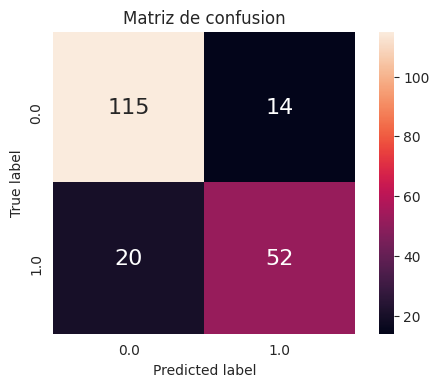

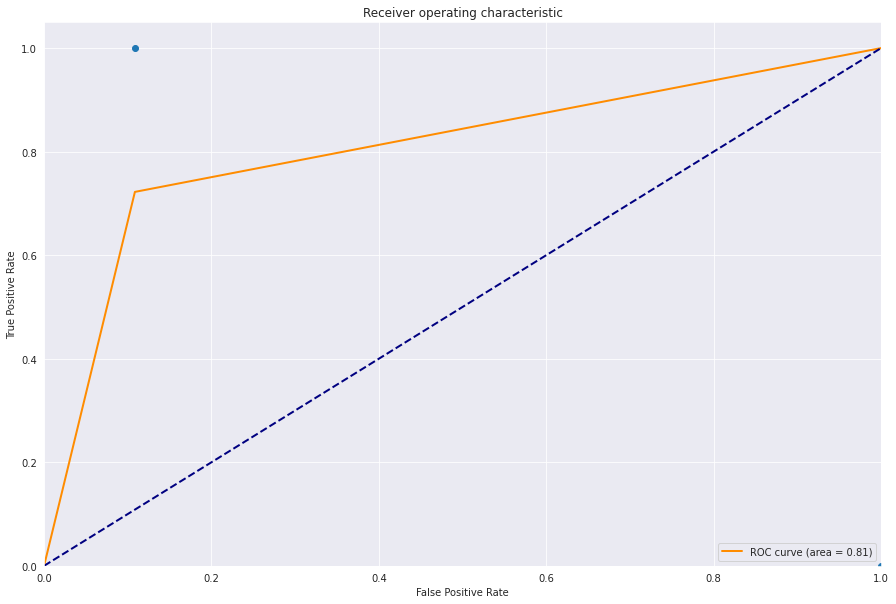

In [7]:
parameters = {'criterion': ['gini', 'entropy'], 'splitter': ["best", "random"], 'max_features' : ["auto", "sqrt", "log2"]}
gscv = GridSearchCV(DecisionTreeClassifier(), parameters)

gscv.fit(X_train, y_train)
print(gscv.best_params_)

preprocessing.report(gscv, X_train, y_train, X_test, y_test)